<a href="https://colab.research.google.com/github/eshaandinesh/Colab/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
dataset, info = tfds.load('tf_flowers', split='train', with_info=True)
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


AttributeError: ignored

In [ ]:

import numpy as np
import matplotlib.pylab as plt

from keras.datasets import mnist

from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

11490434/11490434 [==============================] - 2s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : 7')

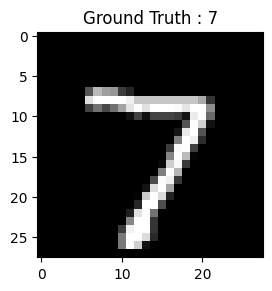

In [ ]:
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)


In [ ]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')


In [ ]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255


In [ ]:
# Change the labels from integer to categorical data

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))


model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=3, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


Epoch 1/3
235/235 [==============================] - 2s 5ms/step - loss: 1.5568 - accuracy: 0.6541 - val_loss: 0.8961 - val_accuracy: 0.8297
Epoch 2/3
235/235 [==============================] - 1s 4ms/step - loss: 0.6961 - accuracy: 0.8467 - val_loss: 0.5332 - val_accuracy: 0.8758
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.4262 - accuracy: 0.8919
Evaluation result on Test Data : Loss = 0.4261710047721863, accuracy = 0.8919000029563904


In [ ]:
#testing strategy
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

mirrored_strategy = tf.distribute.MirroredStrategy()

with mirrored_strategy.scope():
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(dimData,)))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(nClasses, activation='softmax'))


model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=3, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/3
235/235 [==============================] - 8s 7ms/step - loss: 1.5347 - accuracy: 0.6635 - val_loss: 0.8820 - val_accuracy: 0.8289
Epoch 2/3
235/235 [==============================] - 1s 6ms/step - loss: 0.6874 - accuracy: 0.8458 - val_loss: 0.5263 - val_accuracy: 0.8738
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.4213 - accuracy: 0.8908
Evaluation result on Test Data : Loss = 0.4213245213031769, accuracy = 0.8907999992370605


In [ ]:
#testing strategy
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

mirrored_strategy = tf.distribute.OneDeviceStrategy(device = '/gpu:0')

with mirrored_strategy.scope():
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(dimData,)))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(nClasses, activation='softmax'))


model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=3, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

In [ ]:
import timeit
%timeit print('test')

Text(0.5, 1.0, 'Loss Curves')

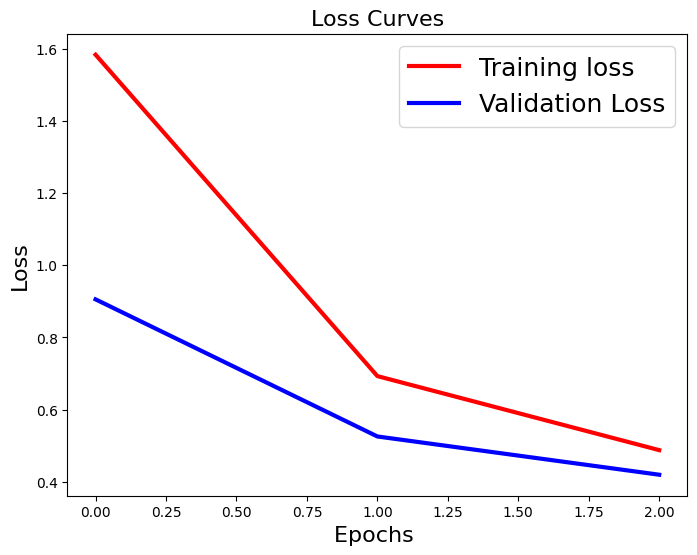

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

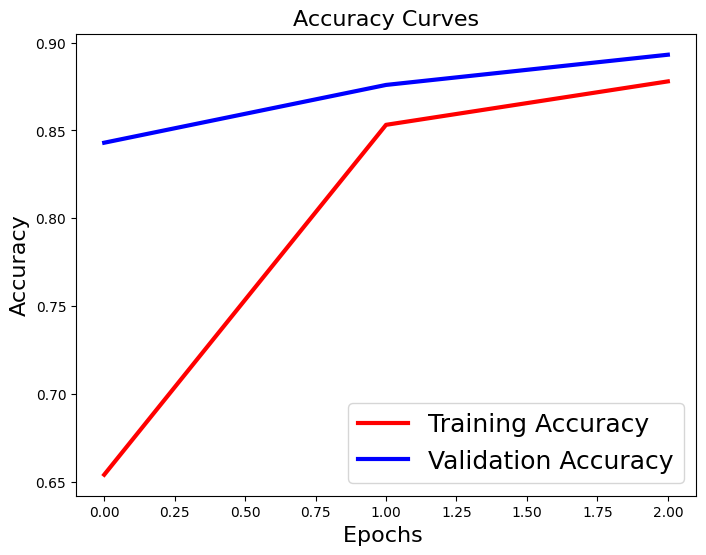

In [ ]:

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# Predict the probabilities for each class
model.predict(test_data[[0],:])

1/1 [==============================] - 0s 240ms/step


array([[5.3293060e-04, 4.5222157e-05, 2.2661228e-04, 8.2149252e-04,
        4.4676830e-04, 6.6870416e-04, 5.4452696e-05, 9.8332918e-01,
        3.9299153e-04, 1.3481634e-02]], dtype=float32)

Timing a function

In [ ]:
import timeit


In [ ]:
start = timeit.default_timer()
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
end = timeit.default_timer()
print(end-start)

313/313 [==============================] - 1s 4ms/step - loss: 0.4198 - accuracy: 0.8931
1.4191348909999988


Executing in GPU

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17077515636400011093
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14357954560
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8478241913153970689
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
!cat /proc/meminfo


MemTotal:       13294208 kB
MemFree:         5819296 kB
MemAvailable:    9597356 kB
Buffers:           69940 kB
Cached:          3920700 kB
SwapCached:            0 kB
Active:           715500 kB
Inactive:        6343496 kB
Active(anon):       1100 kB
Inactive(anon):  3083320 kB
Active(file):     714400 kB
Inactive(file):  3260176 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               236 kB
Writeback:             0 kB
AnonPages:       3068348 kB
Mapped:          1105700 kB
Shmem:             16064 kB
KReclaimable:      88876 kB
Slab:             136712 kB
SReclaimable:      88876 kB
SUnreclaim:        47836 kB
KernelStack:        4816 kB
PageTables:        33328 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647104 kB
Committed_AS:    4284140 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       77616 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
with tf.device(device_name):
  start = timeit.default_timer()
  [test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
  end = timeit.default_timer()
print(end-start)

313/313 [==============================] - 1s 4ms/step - loss: 0.4198 - accuracy: 0.8931
1.2492607979999946


Using the GPU with PyTorch


In [ ]:
import torch
if torch.cuda.is_available():
    device_name = torch.device("cuda")
else:
    device_name = torch.device('cpu')
print("Using {}.".format(device_name))

Using cuda.


In [ ]:
model.to(device_name)

AttributeError: ignored